# SEMESTER PROJECT

### Topic: The Relationship between skin care products and their price

##### July 25th, 2022 

##### Group Members: Avantika Prativadhi, Aqsa Majeed, Sharon Corrales 

# 1. Setup

## Install packages

In [47]:
install.packages("dplyr")  
install.packages("ggplot2")
install.packages("psych") 
install.packages("stats")
install.packages("car")
install.packages("Hmisc")
install.packages("tidyverse")
install.packages("animation")
install.packages("fpc")
install.packages("survival")
install.packages("clusterCrit")


The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages


Warning message:
“package ‘stats’ is a base package, and should not be updated”



The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages

The downloaded binary packages are in
	/var/folders/sk/lkcllkb10nl1_6_s1z575s300000gp/T//RtmpSr9Alu/downloaded_packages


## load packages

In [48]:
library(dplyr)
library(Hmisc)
library(ggplot2)
library(tidyverse)
library(psych)
library(stats)
library(car)
library(animation)
library(fpc)
library(survival)
library(clusterCrit)

# 2. Import and do exploratory analysis on the dataset

In [49]:
skincare <- read.csv("skin_care.csv")

###### look at the first ten rows

In [50]:
head(skincare, 10)

,X,price,title,stars,vote
,<int>,<int>,<chr>,<dbl>,<int>
1,0,6000,BeautyBio Rose Quartz Roller,4.7,75
2,1,2800,Kopari Starry Eye Balm,4.0,11
3,2,7200,StriVectin SuperC Brighten and Correct Serum,4.6,271
4,3,5900,Skin Gym Rose Quartz Facial Workout Set Nordstrom Exclusive USD 92 Value,5.0,1
5,4,9150,Slip Marble and Charcoal Pillowcase and Sleep Mask Set USD 139 Value,5.0,2
6,5,16900,LightStim for Acne LED Light Therapy Device,4.4,29
7,6,6000,Charlotte Tilbury Magic Eye Rescue Cream,3.9,167
8,7,2500,iluminage TOUCH Precision Adaptor,0.0,0
9,8,62500,MZ Skin LightTherapy Golden Facial Treatment Device,0.0,0


### *There are 5 different variables in the dataframe*

##### X : The identification variable
##### price: The cost of each of the product 
##### title : The name of the product
##### stars : The overall rating given to the product 
##### vote : The number of people giving the stars

##### filter out the rows with no stars and less than 50 votes

In [51]:
skincare<-skincare[skincare$stars!=0.0,] 
skincare<-skincare[skincare$vote>50,]

##### convert the values in the price column

In [52]:
skincare$price<-(skincare$price/100)
skincare$price <- ifelse(skincare$price >= 100, skincare$price / 10 , skincare$price)

In [53]:
describe(skincare, 10)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,841,1528.513674,1030.9573383,1419.000,1511.554235,1439.60460,0.00,3243.000,3243.000,0.068567288,-1.463263,35.55025305
price,2,841,38.110678,37.6989041,26.292,32.060266,17.39238,10.11,521.771,511.661,6.152413661,66.950076,1.29996221
title*,3,841,415.969084,239.5391687,417.000,415.961367,306.89820,1.00,831.000,830.000,-0.002509705,-1.202257,8.25997133
stars,4,841,4.496552,0.2910163,4.600,4.529569,0.29652,2.60,5.000,2.400,-1.404557803,3.830322,0.01003504
vote,5,841,280.752675,734.4843482,129.000,168.716196,93.40380,51.00,13221.000,13170.000,13.583601543,227.928931,25.32704649


In [54]:
dim(skincare)

[1] 841   5

##### get count of each variable to see which ratings were given the most 

In [55]:
num<- skincare%>%
  group_by(stars)%>%
  summarise(
    count=n()
  )
print(num)

# A tibble: 18 × 2
   stars count
   <dbl> <int>
 1   2.6     1
 2   2.8     1
 3   3.4     3
 4   3.5     4
 5   3.7     4
 6   3.8    14
 7   3.9    17
 8   4      15
 9   4.1    40
10   4.2    48
11   4.3    67
12   4.4    92
13   4.5   104
14   4.6   132
15   4.7   148
16   4.8   118
17   4.9    30
18   5       3


In [56]:
max(num)
#mostly 5 star ratings were given 

# most expensive product 
max(skincare$price)

[1] 148

[1] 521.771

In [57]:
describe(skincare)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,841,1528.513674,1030.9573383,1419.000,1511.554235,1439.60460,0.00,3243.000,3243.000,0.068567288,-1.463263,35.55025305
price,2,841,38.110678,37.6989041,26.292,32.060266,17.39238,10.11,521.771,511.661,6.152413661,66.950076,1.29996221
title*,3,841,415.969084,239.5391687,417.000,415.961367,306.89820,1.00,831.000,830.000,-0.002509705,-1.202257,8.25997133
stars,4,841,4.496552,0.2910163,4.600,4.529569,0.29652,2.60,5.000,2.400,-1.404557803,3.830322,0.01003504
vote,5,841,280.752675,734.4843482,129.000,168.716196,93.40380,51.00,13221.000,13170.000,13.583601543,227.928931,25.32704649


##### See the correlation between the ratings and the stars

In [58]:
cor(skincare$stars, skincare$vote)

[1] 0.03202487

##### See the correlation between the price and the stars

In [59]:
cor(skincare$stars, skincare$price)

[1] -0.03724937

##### only select the products with five stars that have more than 5 votes 

In [60]:
five_star<-skincare%>%
  filter(stars==5.0 & vote>5)

In [61]:
high_rating<-skincare%>%
  filter(stars>3.9 & vote>5)

##### plot of only the high rated products

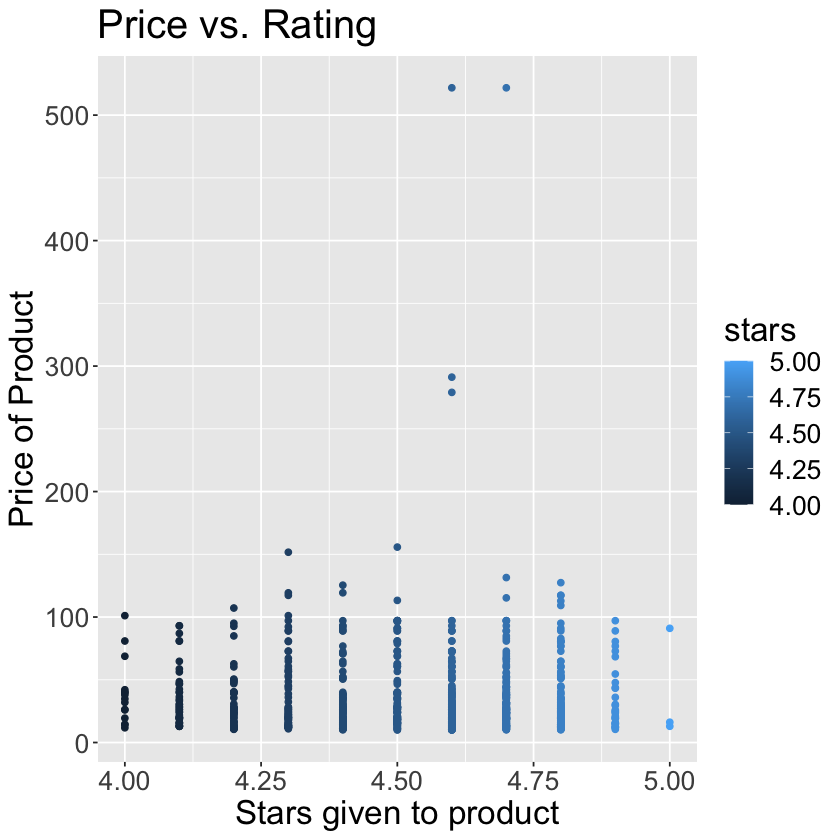

In [62]:
ggplot(high_rating,aes(x=stars,y=price,col=stars))+
  geom_point()+labs(title ="Price vs. Rating",
       x="Stars given to product",
       y="Price of Product",
       )+theme(
    text = element_text(size = 20))



# we didnt use this because it does not show the overall picture of the data, by including all the ratings,
# we're getting a better understanding of if and how the price and stars are related

###### Plot Price vs. Rating

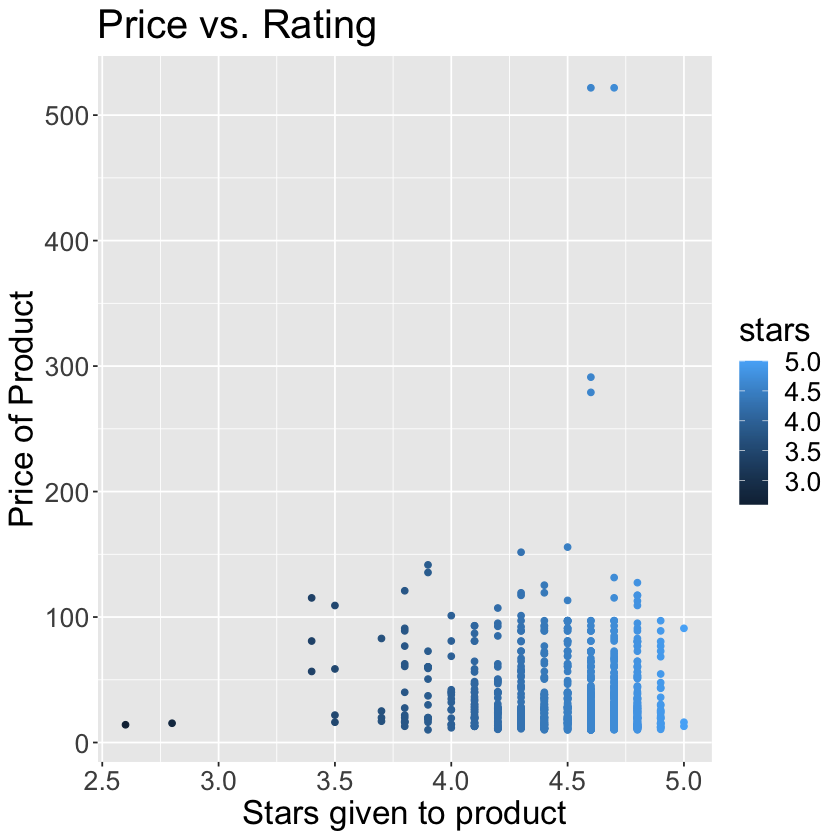

In [63]:
ggplot(skincare,aes(x=stars,y=price,col=stars))+
  geom_point()+labs(title ="Price vs. Rating",
       x="Stars given to product",
       y="Price of Product",
       )+theme(
    text = element_text(size = 20))


In [64]:
# In this plot, we can see that the price and product don't really have a relation. Our hypothesis that the more expensive products 
# have higher ratings while cheaper products have lower ratings, is rejected. Although in the graph, it's evident that higher rating products 
#have higher ratings, it's also seen that even cheapter products have high ratings. 

###### Distrubution of Ratings

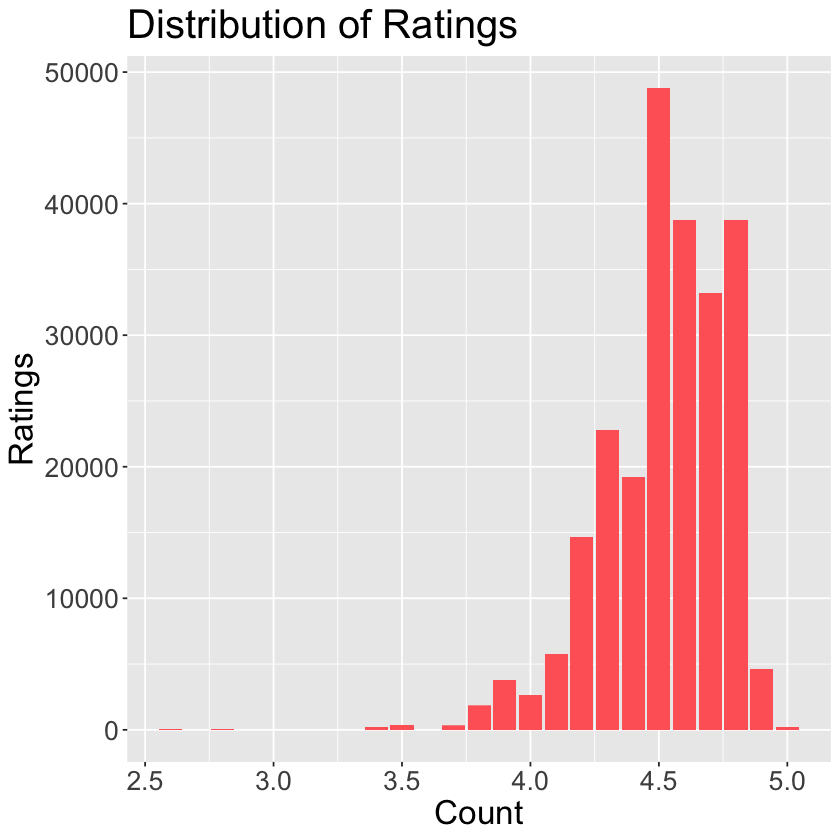

In [65]:
ggplot(skincare,aes(y=vote,x=stars,fill=stars))+
  geom_bar(stat='identity',fill = "#FF6666")+
  labs(title ="Distribution of Ratings",
       x="Count",
       y="Ratings",
       )+
theme(
    text = element_text(size = 20))
  

In [66]:
# According to the plot, the products at Nordstrom are generally high rated (between 4.0 and 5.0 stars) 

# 3. Cluster Analysis using k-means 

In [67]:
set.seed(88)
cluster.skincare <- kmeans(skincare[,2,4], 5, nstart = 20)
cluster.skincare

K-means clustering with 5 clusters of sizes 4, 121, 242, 383, 91

Cluster means:
       [,1]
1 403.44000
2  60.47493
3  32.82958
4  16.65721
5  96.65255

Clustering vector:
  [1] 2 2 2 2 4 4 4 2 3 4 3 2 3 4 2 3 4 3 3 3 3 3 3 5 2 2 2 3 4 4 2 2 5 3 3 3 3
 [38] 4 5 4 3 4 4 3 4 3 3 5 2 4 3 4 5 4 4 3 4 2 4 2 3 3 5 3 4 4 4 4 3 4 3 5 3 4
 [75] 3 4 4 3 3 3 5 3 4 2 4 3 3 2 4 2 3 4 2 5 4 4 4 4 4 4 2 4 4 4 3 4 4 4 3 3 3
[112] 3 3 3 5 4 2 4 4 4 4 4 3 4 4 4 4 2 4 2 4 2 2 4 3 5 2 3 4 2 4 2 3 4 3 4 4 2
[149] 3 5 2 4 4 2 5 4 3 4 3 3 2 4 3 4 4 4 3 3 2 4 3 3 5 3 3 4 3 4 2 4 3 2 4 3 4
[186] 3 3 2 5 4 3 3 2 4 4 4 3 2 4 2 4 3 4 3 4 4 4 4 3 4 4 3 4 4 4 4 3 3 4 4 4 2
[223] 4 4 2 4 4 3 2 3 3 3 2 4 4 2 3 5 4 4 4 3 4 2 5 3 4 4 4 3 4 3 3 4 3 3 4 2 4
[260] 3 5 5 4 2 4 2 2 5 3 4 4 5 3 2 3 4 3 4 4 4 4 3 3 3 5 2 5 4 4 5 4 4 4 4 4 3
[297] 4 3 4 3 5 3 4 4 3 3 4 2 3 4 2 4 3 3 5 4 4 4 5 4 4 4 3 3 4 4 2 4 4 2 3 2 4
[334] 2 2 2 3 2 4 4 4 4 2 5 3 4 3 5 3 4 4 3 5 3 2 4 4 4 5 2 4 4 4 3 5 4 4 5 2 4
[371] 4 4 2 4 5 2 4 3 4 4 5

In [68]:
cluster.table<-table(cluster.skincare$cluster, skincare$title)

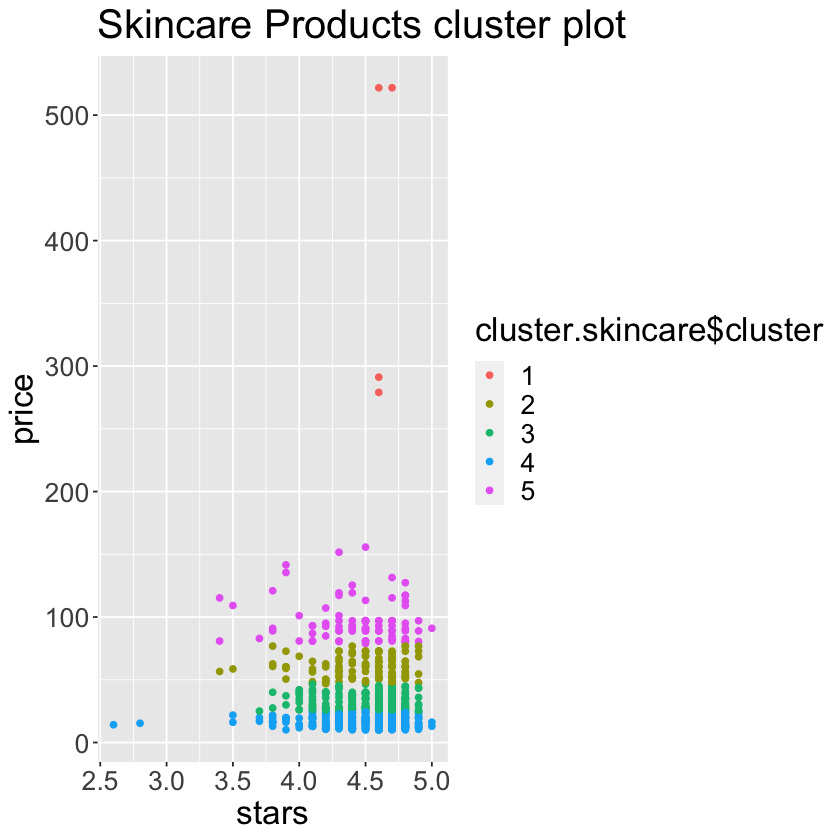

In [69]:
cluster.skincare$cluster <- as.factor(cluster.skincare$cluster)
ggplot(skincare, aes(stars, price, color=cluster.skincare$cluster )) + geom_point() + ggtitle("Skincare Products cluster plot")+
theme(
    text = element_text(size = 20))

# 4. Creating the model

In [70]:
model1 <- lm(stars ~ price,
          data=skincare,
          na.action=na.exclude)

summary(model1)


Call:
lm(formula = stars ~ price, data = skincare, na.action = na.exclude)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.90344 -0.17844  0.09575  0.20156  0.51866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.5075103  0.0142723  315.82   <2e-16 ***
price       -0.0002875  0.0002663   -1.08    0.281    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.291 on 839 degrees of freedom
Multiple R-squared:  0.001388,	Adjusted R-squared:  0.0001973 
F-statistic: 1.166 on 1 and 839 DF,  p-value: 0.2806


###### Regression line on datapoints

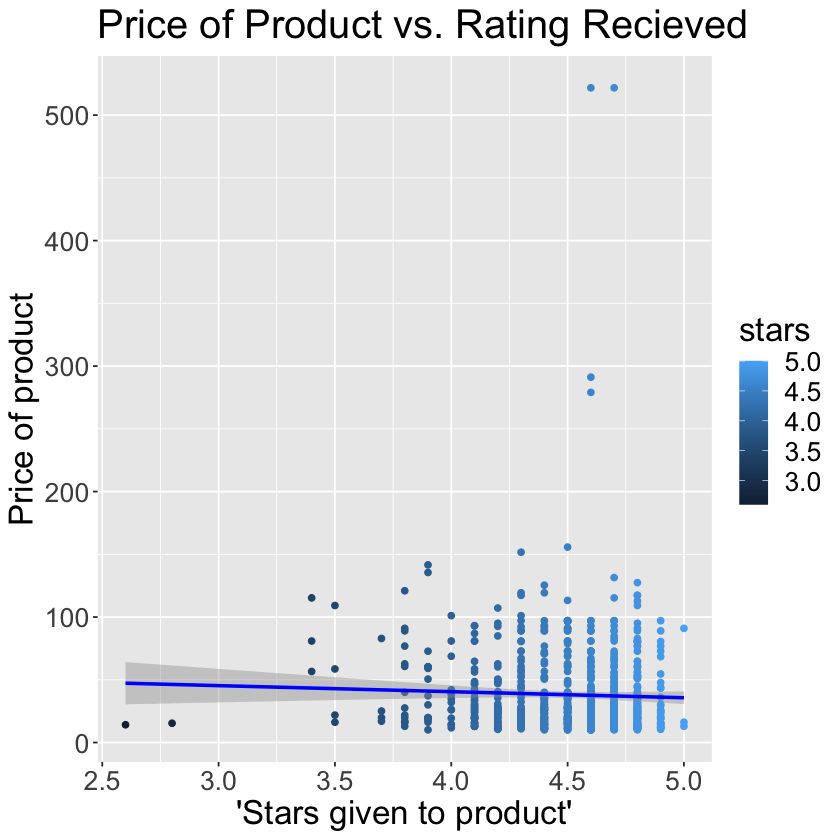

In [71]:
model1_plot <- ggplot(skincare, aes(x=stars, y=price,col=stars)) + 
              geom_point() +
              stat_smooth(method='lm', formula = y ~ x, color="blue", size = 1) +
labs(title ="Price of Product vs. Rating Recieved",
       x="'Stars given to product'",
       y="Price of product",
       )+theme(
    text = element_text(size = 20))
  
          

print(model1_plot)

###### QQplot of model

1916 3018 
 482  775

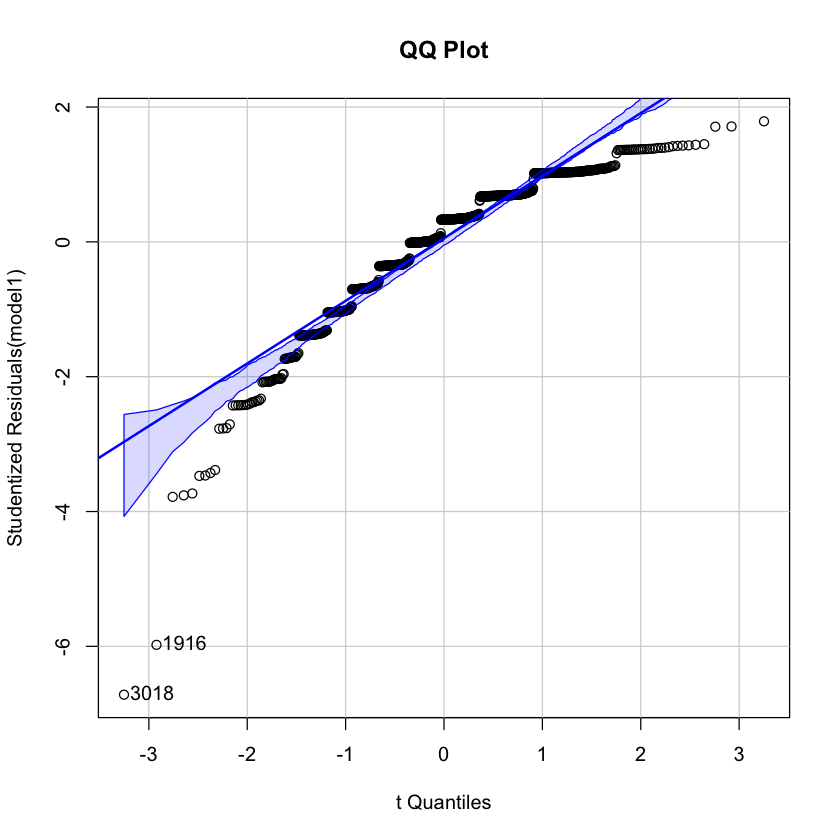

In [72]:
qqPlot(model1, main = "QQ Plot")

###### Testing for outliers 

In [73]:
outlierTest(model1)

      rstudent unadjusted p-value Bonferroni p
3018 -6.716683         3.4290e-11   2.8838e-08
1916 -5.977557         3.3489e-09   2.8164e-06

###### Leverage plot

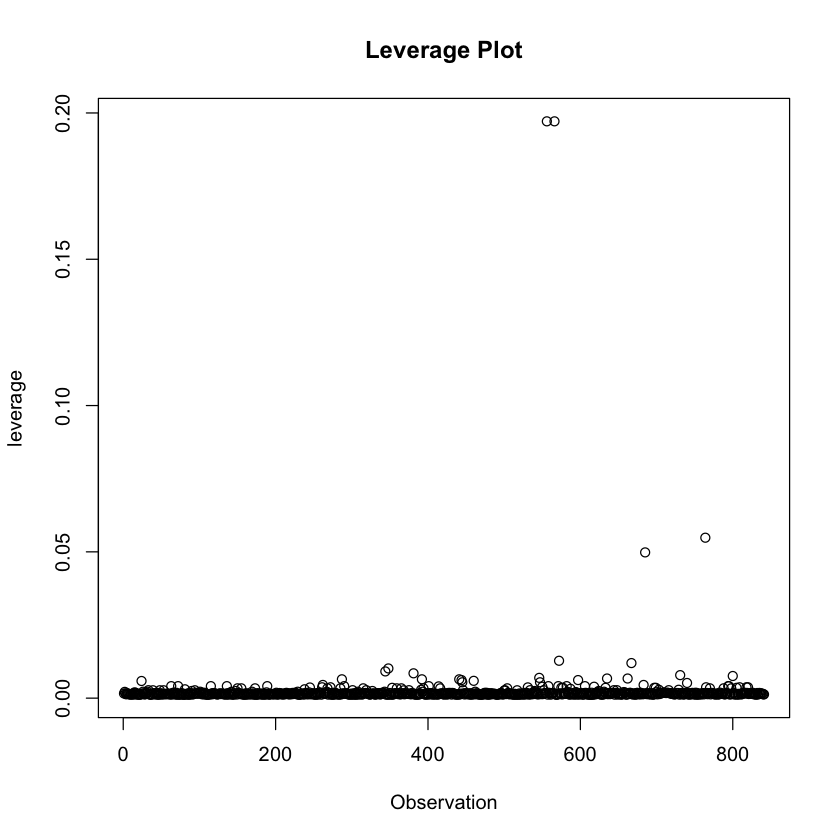

In [74]:
leverage = hatvalues(model1)
  ## hatvalues() is a function from the stats package
plot(leverage, main = "Leverage Plot", xlab = "Observation")

###### Cook's Distance

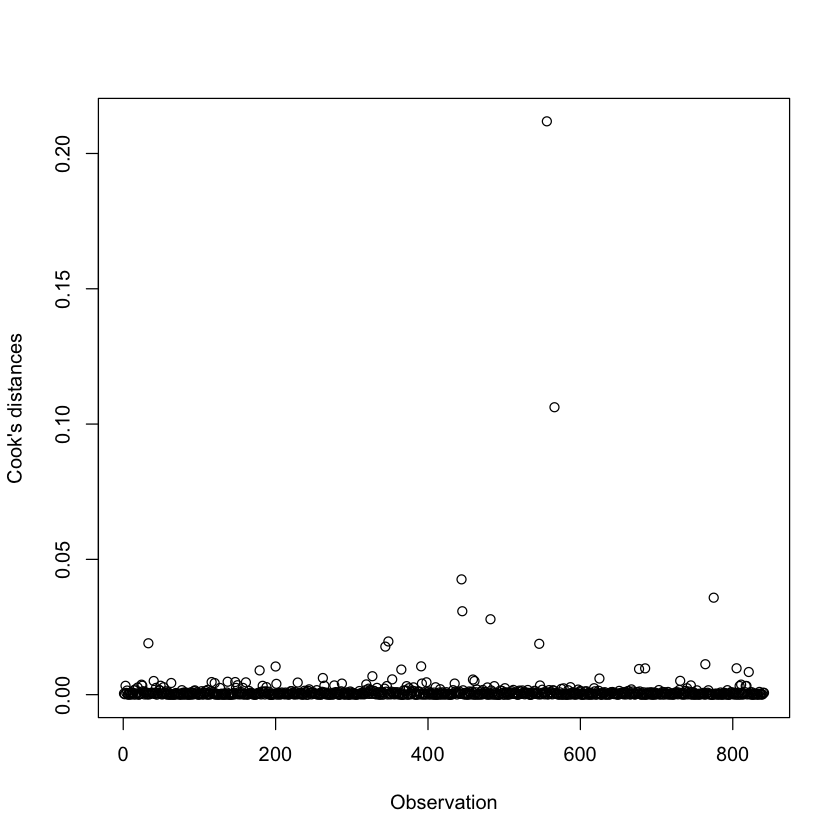

In [75]:
cook = cooks.distance(model1)
  # cooks.distance() is a function from the stats package
plot(cook, xlab = "Observation", ylab="Cook's distances")
  # plot() is a function from the graphics package

# 5. K-fold Cross-Validation

In [76]:
# shuffle the data
shuffled <- skincare[sample(nrow(skincare)),]

In [77]:
folds <- cut(seq(1, nrow(shuffled)), breaks = 5, labels = FALSE)

In [78]:
squared_correlation = matrix(data=NA, nrow=5, ncol=5)
mse = matrix(data=NA, nrow=5, ncol=5)

###### Fitting the model


Call:
lm(formula = price ~ poly(stars, 5), data = skincare, na.action = na.exclude)

Residuals:
   Min     1Q Median     3Q    Max 
-43.75 -20.87 -11.10   9.97 483.20 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      38.11068    1.29891  29.340   <2e-16 ***
poly(stars, 5)1 -40.69934   37.66849  -1.080    0.280    
poly(stars, 5)2  -0.06945   37.66849  -0.002    0.999    
poly(stars, 5)3  40.92449   37.66849   1.086    0.278    
poly(stars, 5)4 -74.91597   37.66849  -1.989    0.047 *  
poly(stars, 5)5  -8.73631   37.66849  -0.232    0.817    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.67 on 835 degrees of freedom
Multiple R-squared:  0.007556,	Adjusted R-squared:  0.001613 
F-statistic: 1.271 on 5 and 835 DF,  p-value: 0.2741


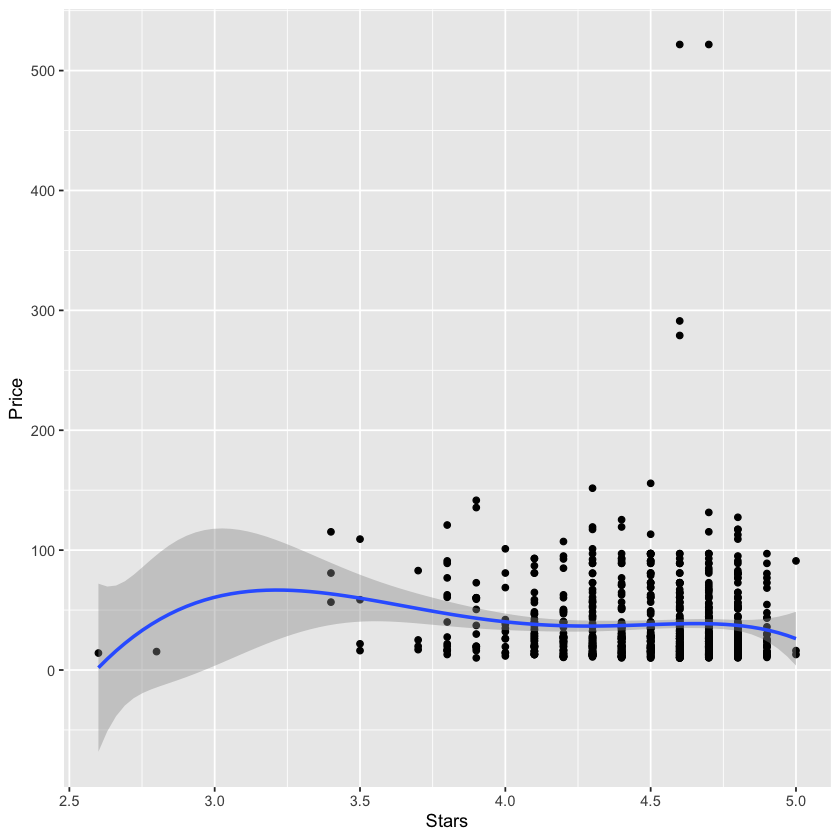

In [ ]:
final = lm(price~poly(stars,5), 
              data=skincare,
              na.action=na.exclude)
summary(final)

ggplot(skincare, aes(x=stars, y=price)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x,5), size = 1) + 
          xlab('Stars') + ylab('Price')
